<a href="https://colab.research.google.com/github/wkdtjrrb/SPIDER/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%8A%A4%ED%84%B0%EB%94%94_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-3. 신경망 모델 훈련

**저번 예제**

In [ ]:
# keras 불러오기
from tensorflow import keras

# 패션 MNIST 데이터셋 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 입력 데이터를 0~1로 변환
train_scaled = train_input/255.0

# 훈련 데이터와 검증 데이터 분리
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5289 - accuracy: 0.8142
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3934 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3564 - accuracy: 0.8712
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3333 - accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3196 - accuracy: 0.8856


**<keras.callbacks.History at 0x7ca04ec6a230>**  

- fit() 메서드: 손실, 정확도 값이 저장된 History 클래스 객체를 반환한다.



In [ ]:
# 새로운 모델 정의
# 기본 구조: 입력층, 은닉층(노드 100개), 출력층
# 은닉층을 추가할 수 있다.

def model_fn(a_layer=None):

  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer:
    model.add(a_layer)

  model.add(keras.layers.Dense(10, activation='softmax'))

  return model

In [ ]:
# 은닉층 추가 안한 기본 구조의 모델
model = model_fn()
model_fn().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 손실, 정확도 값이 저장된 History 클래스 객체를 변수에 저장
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
# History 객체 안에 history 딕셔너리가 들어있다.
# loss, accuracy 값 저장

print(history.history.keys())
print(history.history)

dict_keys(['loss', 'accuracy'])
{'loss': [0.5311156511306763, 0.39527779817581177, 0.35627055168151855, 0.3327597379684448, 0.31758561730384827], 'accuracy': [0.812125027179718, 0.8575000166893005, 0.8744375109672546, 0.8800833225250244, 0.8865208625793457]}


**훈련 세트에 대한 그래프**

In [ ]:
import matplotlib.pyplot as plt

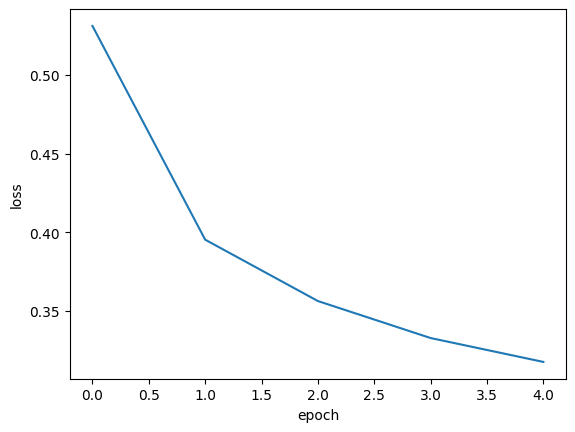

In [ ]:
# 손실
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

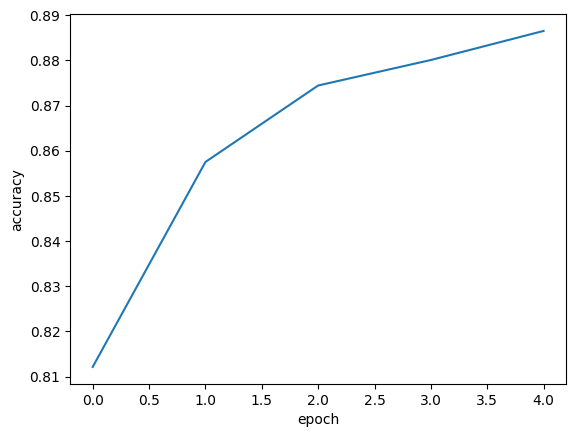

In [ ]:
# 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

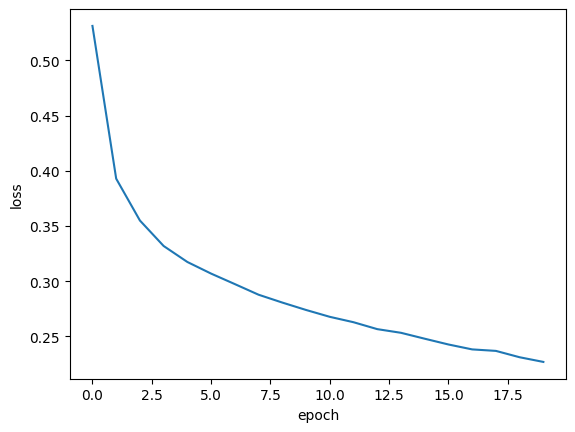

In [ ]:
# 에포크 횟수를 20으로 증가시키면

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**과소적합과 과대적합**

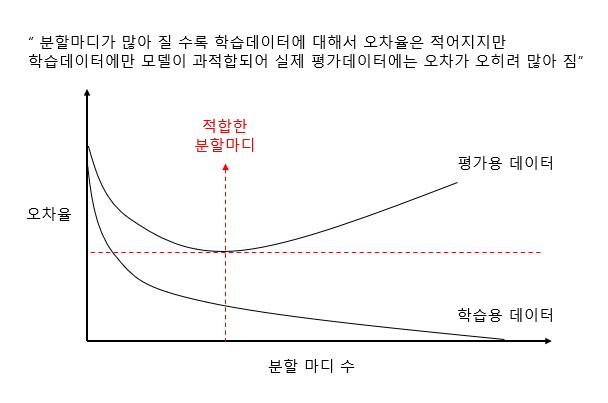

**검증 세트에 대한 그래프**

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


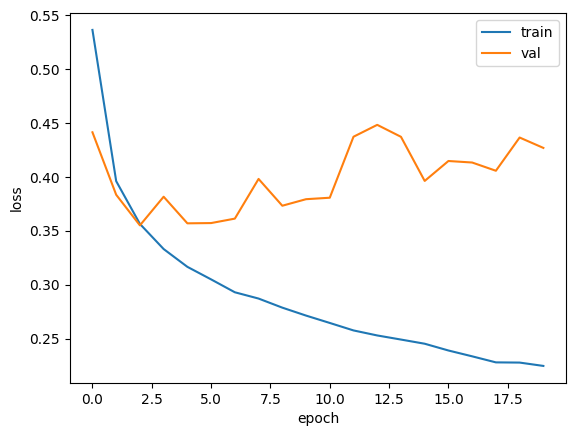

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**과대적합 줄이기**  

1) 옵티마이저 하이퍼파라미터 조정  
- 옵티마이저의 종류  
- 학습률

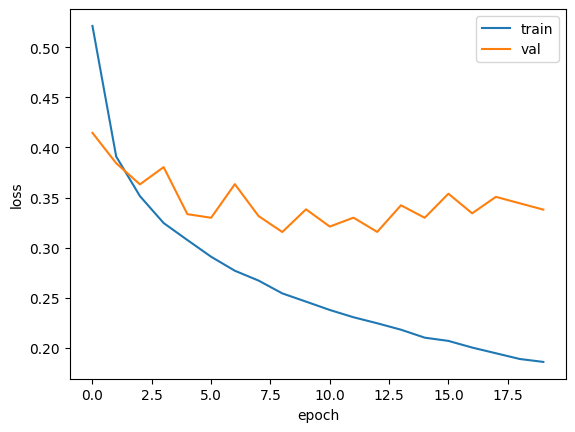

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam') # 옵티마이저: adam
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**과대적합 줄이기**  

2) 드롭아웃: 일부 뉴런의 출력을 0으로 만든다.
- 특정 뉴런에 과도하게 의존하는 것을 방지  
- 앙상블의 효과

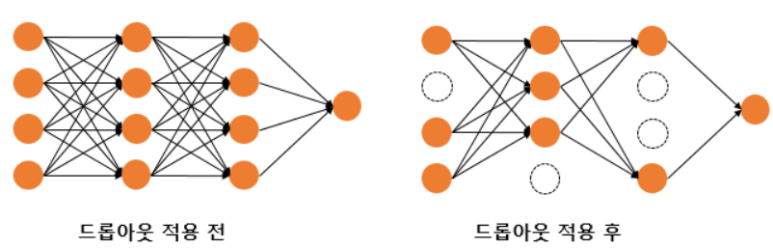

In [ ]:
# 드롭아웃 층 추가
# 30% 뉴런의 출력을 0으로 만든다.

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


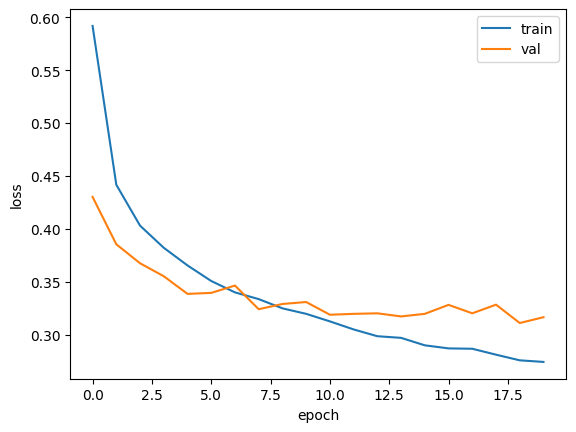

In [ ]:
# 모델 컴파일(옵티마이저: adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 검증할 때에는 드롭아웃이 적용되지 않는다.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

# 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**모델 저장과 복원**

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=18, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
# 모델의 파라미터 저장(체크포인트 포맷 or HDF5 포맷)
model.save_weights('model-weights.h5')

# 모델 구조와 모델 파라미터 함께 저장(SavedModel 포맷 or HDF5 포맷)
model.save('model-whole.h5')

1) 훈련하지 않은 모델에 훈련된 파라미터를 사용

In [ ]:
# load_weights() 메서드를 사용하려면 저장했던 모델과 같은 구조를 가져야 한다.
model = model_fn(keras.layers.Dropout(0.3))

# 모델에 저장된 파라미터를 적재
model.load_weights('model-weights.h5')

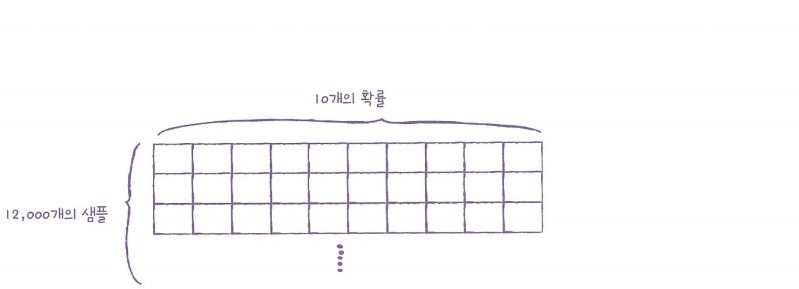

In [ ]:
# 정확도 계산
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

375/375 [==============================] - 1s 2ms/step
0.8865833333333333


2) 모델 전체를 불러와 사용

In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8866


[0.32055166363716125, 0.8865833282470703]

**콜백**: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

1) ModelCheckpoint: 에포크마다 모델을 저장

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8864


[0.3143569231033325, 0.8864166736602783]

2) EarlyStopping: 특정 횟수 동안 점수가 향상되지 않으면 훈련 중지

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.7897
Epoch 1: val_loss improved from inf to 0.44367, saving model to best-model.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5927 - accuracy: 0.7897 - val_loss: 0.4437 - val_accuracy: 0.8411
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.4422 - accuracy: 0.8430
Epoch 2: val_loss improved from 0.44367 to 0.38401, saving model to best-model.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4421 - accuracy: 0.8430 - val_loss: 0.3840 - val_accuracy: 0.8598
Epoch 3/20
1487/1500 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.8513
Epoch 3: val_loss improved from 0.38401 to 0.36931, saving model to best-model.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4070 - accuracy: 0.8516 - val_loss: 0.3693 - val_accuracy: 0.8656
Epoch 4/20
1494/1500 [============================>.] - ETA: 0s -

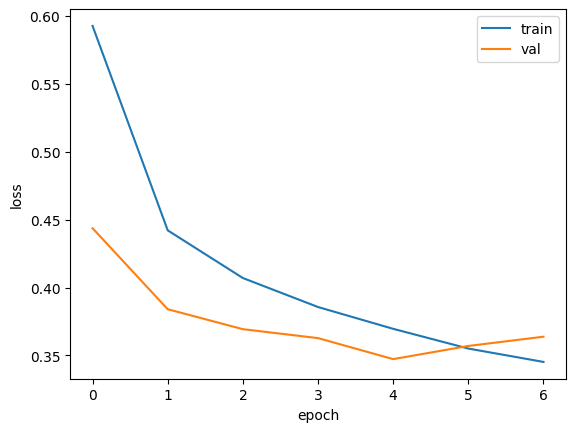

In [ ]:
# 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 8-1. 합성곱 신경망의 구성 요소

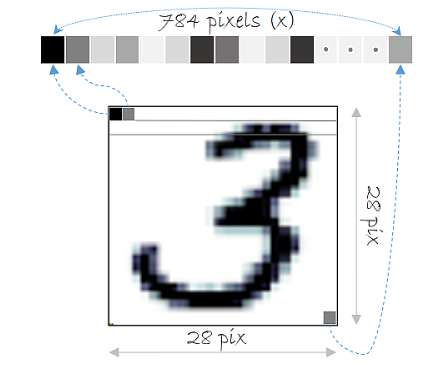

**합성곱 신경망(CNN)** 등장 배경    
- CNN이 나오기 이전에는 2차원 배열을 1차원 배열로 바꾼 뒤 학습시켰다.  
- Flatten화 하는 과정에서 구조적으로 인접한 픽셀 간의 연관성이 무시될 수 있다.  
- 각 노드마다 가중치가 존재하기 때문에 연산량이 증가한다.  

-> CNN: 2차원, 3차원 배열을 다룰 수 있으며 적은 파라미터로 좋은 성능을 낸다.

**합성곱**

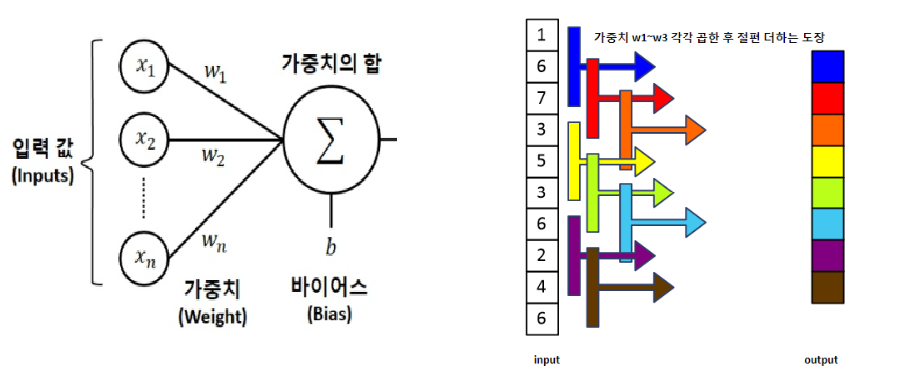

**필터와 커널**  
- 필터는 여러 개의 커널로 구성될 수 있다.  
- 커널의 개수=채널 수  

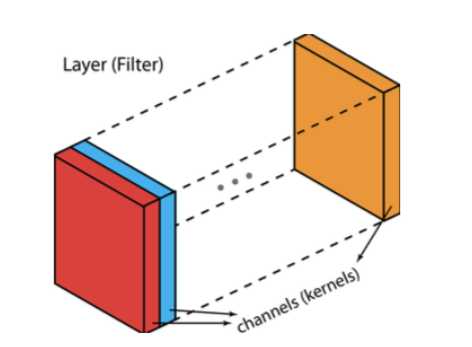

**연산 방법**  

1) 2차원 입력, 커널 1개, 필터 1개

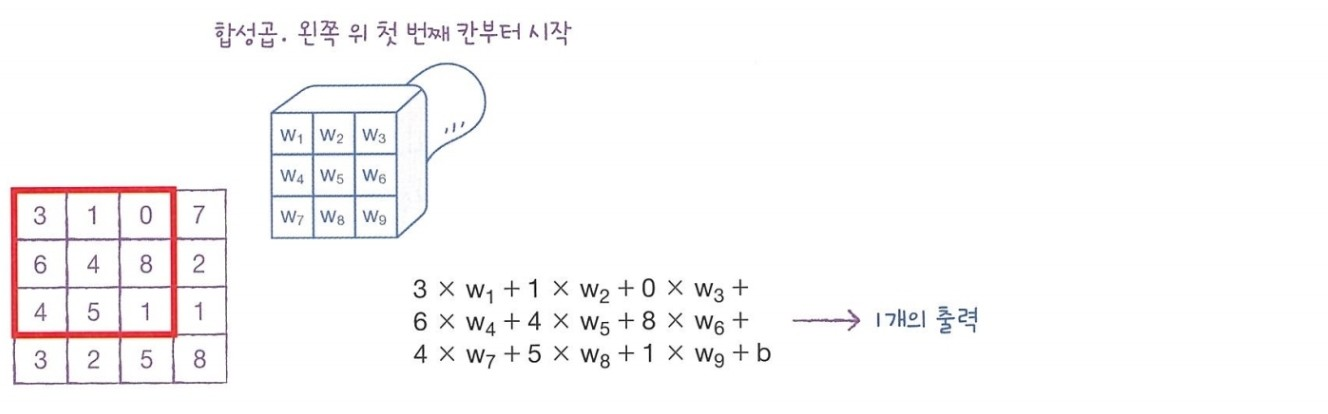

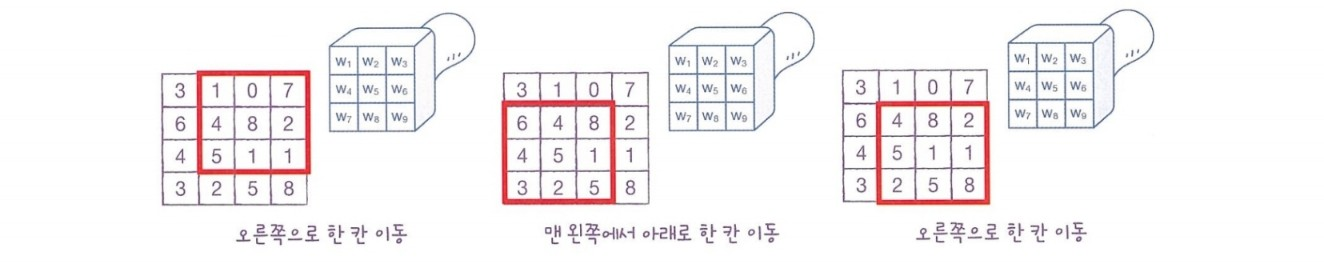

**특성 맵**

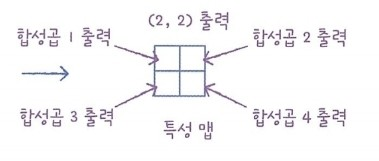

**연산 방법**  

2) 2차원 입력, 커널 여러 개, 필터 여러 개
- 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다.(?)  
- 각각의 특성 맵을 쌓는다.

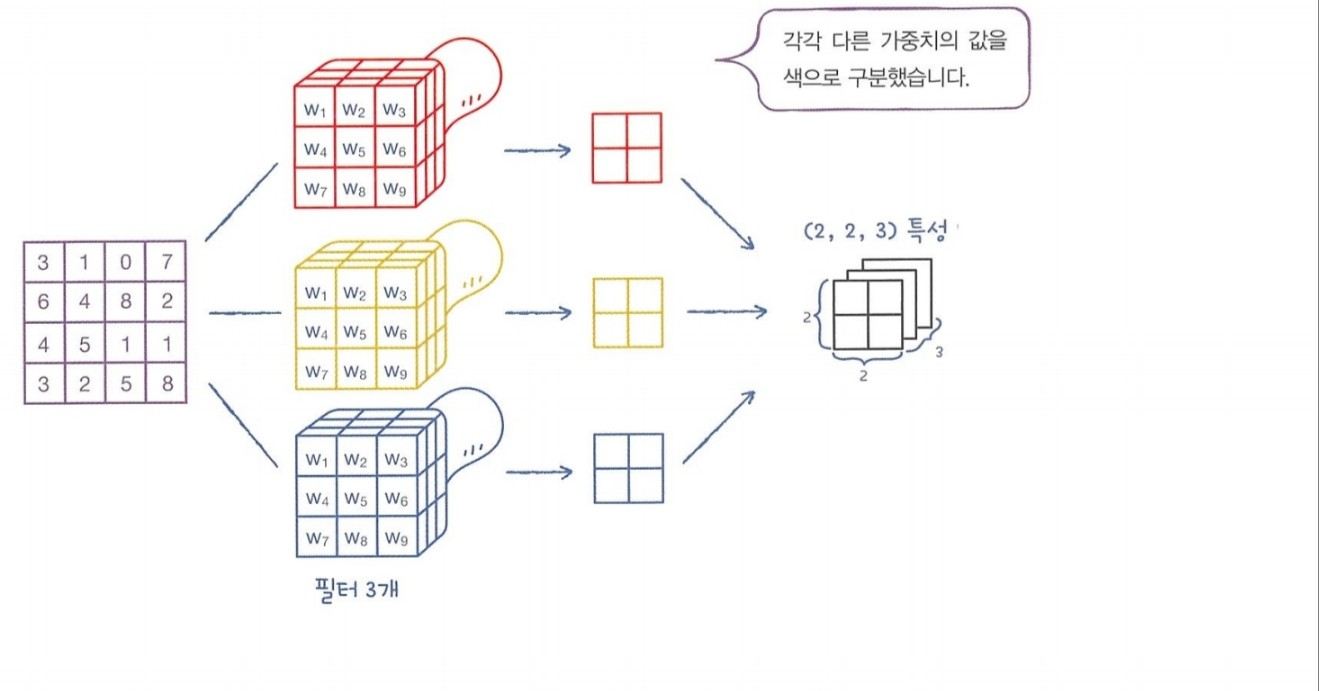

**연산 방법**  

3) 3차원 입력  
- 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다.

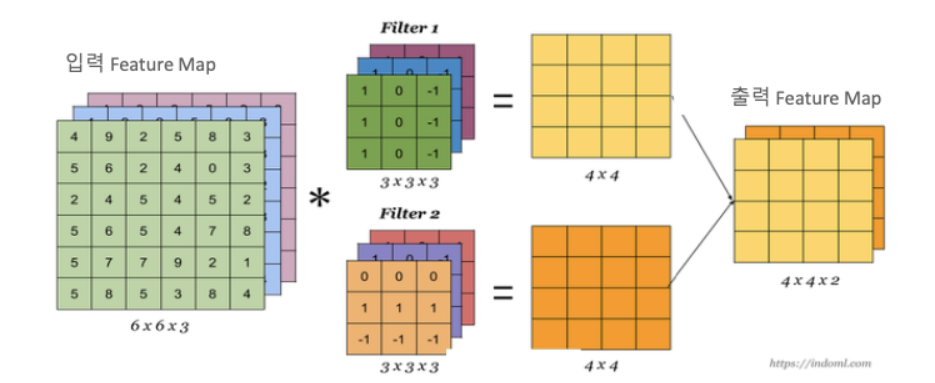

**패딩**  
- 입력 배열의 주위를 가상의 원소(보통 0)로 채우는 것
- 컨볼루션 연산을 수행하면 데이터 크기가 줄어드는 단점을 방지하기 위해 사용한다.    
- 중앙부와 모서리 픽셀이 합성곱에 참여하는 비율의 차이를 줄여준다.


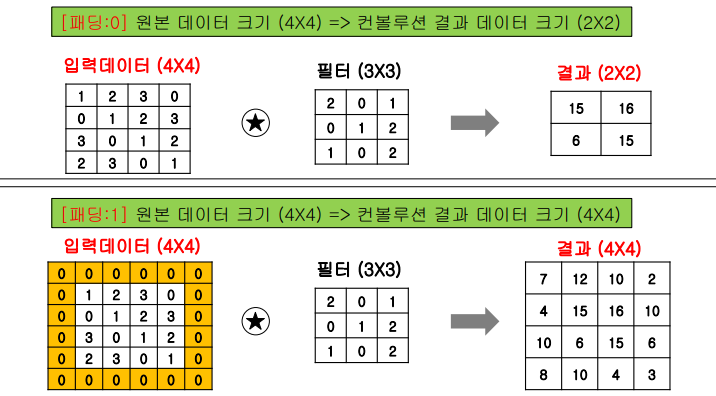

-세임 패딩: 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위를 0으로 패딩하는 것  

-밸리드 패딩: 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 것

**스트라이드**  
- 필터의 이동 크기
- 기본값=1  
- (1,1)과 같이 튜플로 지정할 수 있으나, 이동 크기를 가로세로 방향으로 다르게 지정하는 경우는 거의 없다

**케라스 합성곱 층**

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1) # 필터 개수, 커널 사이즈, 활성화 함수, 패딩, 스트라이드

**풀링**  
- 합성곱 층에서 만든 특성 맵의 정보를 최대값, 평균값 등으로 압축하여 데이터 연산량을 줄여주는 역할 수행  
- 가중치 없음, 패딩 없음  
- 풀링의 크기=스트라이드  
- 풀링의 크기를 (2,3)과 같이 튜플로 지정할 수 있으나, 극히 드물다.

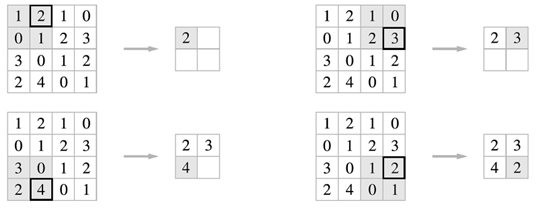

In [ ]:
# 최대 풀링
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

# 평균 풀링
# 중요한 정보를 (평균하여) 희석시킬 수 있기 때문에 최대 풀링을 더 많이 사용한다.
keras.layers.AveragePooling2D(2)

**정리**

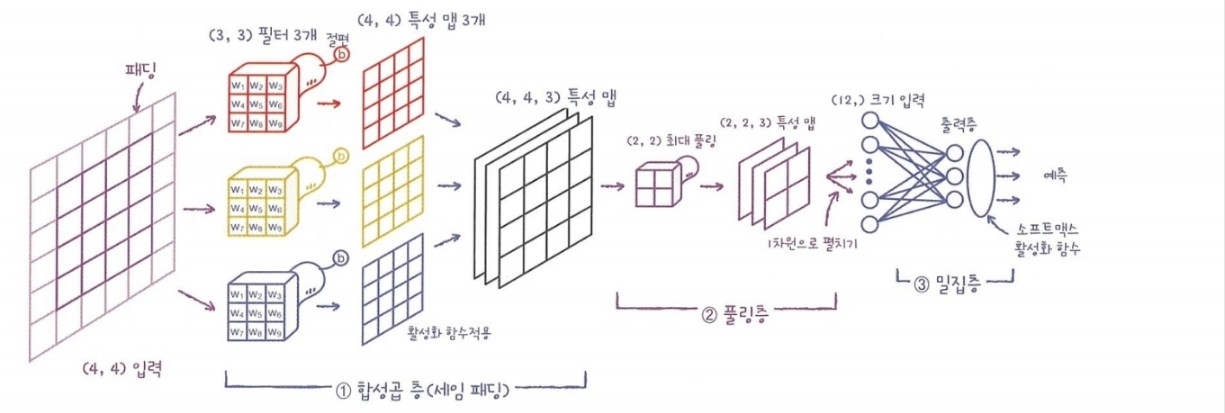

1. (4,4) 입력 데이터  
2. 입력과 특성 맵의 크기를 같게 하기 위해 패딩 추가  
3. (3,3) 필터 3개와 각 필터마다 절편(b)이 있음
4. 합성곱의 결과 (4,4) 특성 맵 3개 -> 활성화 함수 -> (4,4,3)으로 쌓기
5. 최대 풀링 결과 (2,2,3) 특성 맵  
6. 5의 특성맵을 1차원으로 펼친다.(Flatten)

# 예제  
합성곱과 풀링 층을 추가하고, 하이퍼파라미터(층 개수, 학습률, 드롭아웃 비율, 에포크 수 등)를 조정하여 자신만의 모델을 만들어라.  
(정확도 최대한 높이기)

In [ ]:
'''준비'''

# keras 불러오기
from tensorflow import keras

# 패션 MNIST 데이터셋 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape)

# Conv2D 층의 입력 데이터 형태에 맞게 변환(높이,너비,채널)
train_input = train_input.reshape(-1,28,28,1)
print(train_input.shape)

# 입력 데이터를 0~1로 변환
train_scaled = train_input/255.0

# 훈련 데이터와 검증 데이터 분리
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

(60000, 28, 28)
(60000, 28, 28, 1)


예시)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', strides=1, input_shape=(28,28,1))) # 합성곱 층
model.add(keras.layers.MaxPooling2D(2)) # 풀링 층

model.add(keras.layers.Flatten()) # 1차원 배열로 변환
model.add(keras.layers.Dropout(0.5)) # 드롭아웃
model.add(keras.layers.Dense(512, activation='relu')) # 은닉층1
model.add(keras.layers.Dropout(0.4)) # 드롭아웃
model.add(keras.layers.Dense(128, activation='relu')) # 은닉층2
model.add(keras.layers.Dropout(0.2)) # 드롭아웃
model.add(keras.layers.Dense(10, activation='softmax')) # 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True, verbose=1)
reducelr_cb = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, verbose=1)

# 모델 훈련
model.fit(train_scaled, train_target, epochs=50, verbose=1,
          validation_data=(val_scaled, val_target),
          batch_size=128,
          callbacks=[checkpoint_cb, reducelr_cb, early_stopping_cb])

# 검증 데이터 정확도(93%)
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 0.5326 - accuracy: 0.8105
Epoch 1: val_loss improved from inf to 0.32675, saving model to best-model.h5
375/375 [==============================] - 80s 210ms/step - loss: 0.5326 - accuracy: 0.8105 - val_loss: 0.3267 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 2/50
375/375 [==============================] - ETA: 0s - loss: 0.3479 - accuracy: 0.8748
Epoch 2: val_loss improved from 0.32675 to 0.29542, saving model to best-model.h5
375/375 [==============================] - 72s 193ms/step - loss: 0.3479 - accuracy: 0.8748 - val_loss: 0.2954 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8886
Epoch 3: val_loss improved from 0.29542 to 0.26605, saving model to best-model.h5
375/375 [==============================] - 72s 192ms/step - loss: 0.3039 - accuracy: 0.8886 - val_loss: 0.2661 - val_accuracy: 0.9012 - lr: 0.0010
Epoch 4/50
375/375 [=========

[0.21179331839084625, 0.9308333396911621]